In [1]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('conposcovidloc.csv')
df.head(5)
df #39075 rows/entries in dataframe
#Accurate Episode Date is an approximate date for the onset of the illness, blank records may exist.
#Case Reported Date is the date when the case was reported to the Public Health Unit (PHU).
#Test Reported Date is the date when the case was confirmed COVID positive in testing.
#Specimen Date is the earliest date when a virus specimen was retrieved from the case.
#Case Acquisition is suspected method of how the virus was contracted.
#Outcome1 is patient outcome.
#Outbreak related is if that case was linked with a COVID outbreak in an institutional setting.
#Reporting_PHU refers to the health unit working on the case.
#Reporting_PHU_City is the base city of the health unit.
#Reporting_PHU_Latitude and Reporting_PHU_Longitude are for mapping purposes of physical PHU address.

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-07-18,2020-07-18,2020-07-18,2020-07-15,60s,MALE,No Epi-link,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-07-26,2020-07-27,2020-07-27,2020-07-26,20s,MALE,No Epi-link,Not Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-07-20,2020-07-21,2020-07-21,2020-07-20,20s,MALE,CC,Not Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
3,4,2020-07-14,2020-07-17,2020-07-17,2020-07-15,<20,FEMALE,CC,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
4,5,2020-07-17,2020-07-18,2020-07-18,2020-07-17,50s,MALE,CC,Not Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39070,39071,2020-04-05,2020-04-07,2020-04-07,2020-04-06,70s,FEMALE,OB,Resolved,Yes,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
39071,39072,2020-04-03,2020-04-08,2020-04-07,2020-04-06,80s,FEMALE,OB,Fatal,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
39072,39073,2020-04-04,2020-04-08,2020-04-08,NaN,60s,FEMALE,CC,Resolved,NaN,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
39073,39074,2020-03-26,2020-04-08,2020-04-08,NaN,40s,FEMALE,OB,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893


In [3]:
#How many unique Accurate Episode and Case Reported dates are in this dataset?
df_acc_ep = df['Accurate_Episode_Date'].nunique()
df_acc_ep #175 unique accurate episode dates recorded
df_case_rep = df['Case_Reported_Date'].nunique()
df_case_rep #158 unique case reported dates

158

['60s' '20s' '<20' '50s' '40s' '30s' '70s' '80s' '90s' 'UNKNOWN']


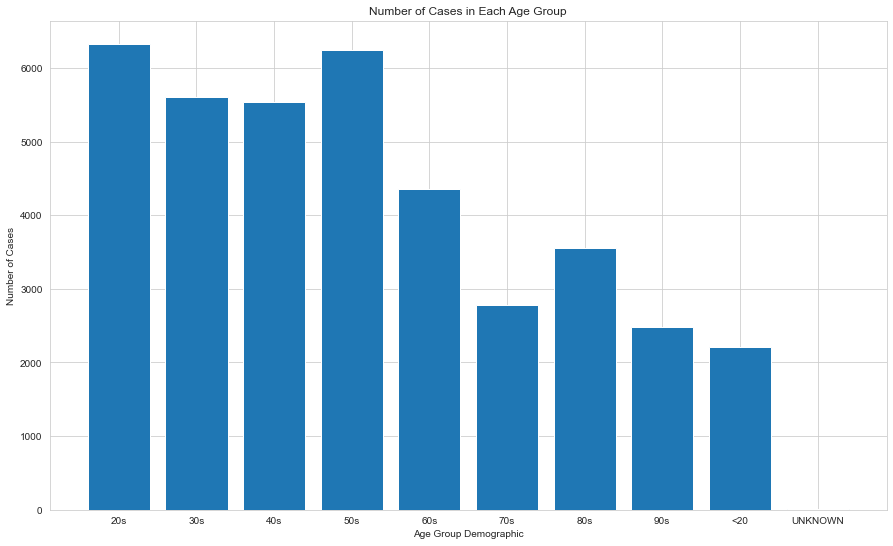

<Figure size 432x288 with 0 Axes>

In [30]:
print(df['Age_Group'].unique())
#possible age group values are 20s, 30s, 40s, 50s, 60s, 70s, 80s, 90s and 'UNKNOWN'
df_age = df.groupby('Age_Group').Row_ID.count().reset_index()
df_age
#This new dataframe df_age is organized by patient age groups and shows number of rows/entries within each age group.
#6326 patients are in 20s, 5599 are in 30s, 5533 are in 40s, 6240 are in 50s, 4349 are in 60s, 2784 are in 70s, 3556 are in 80s, 2476 are in 90s, 2206 are <20 and 6 are unknown age.
plt.figure(figsize = (15,9))
plt.bar(df_age.Age_Group.values, df_age.Row_ID.values)
plt.ylabel('Number of Cases')
plt.xlabel('Age Group Demographic')
plt.title('Number of Cases in Each Age Group')
plt.show()
plt.savefig('Number_of_Cases_in_Each_Group.png')
#Bar graph to show difference between number of cases in each age demographic
#How much of each gender makes up the number of cases within each age group?

In [5]:
df_age_gender = df.groupby(['Age_Group', 'Client_Gender']).Row_ID.count().reset_index().sort_values(by='Age_Group')
df_age_gender
#df_age_gender shows the number of entries within each age group that fall under the different client gender categories.
df_age_gender.Client_Gender.unique()
#The possible different client genders are female, male, other, unknown, transgender
pivot_df_age_gender = df_age_gender.pivot(index='Age_Group', columns='Client_Gender', values='Row_ID')
#This table shows number of persons in each age group that identify within one of the client gender values.
pivot_df_age_gender
pivot_df_age_gender['Percent Male'] =(pivot_df_age_gender.MALE /( pivot_df_age_gender.MALE + pivot_df_age_gender.FEMALE))*100
pivot_df_age_gender['Percent Female'] = (pivot_df_age_gender.FEMALE /(pivot_df_age_gender.MALE + pivot_df_age_gender.FEMALE))*100
pivot_df_age_gender

Client_Gender,FEMALE,MALE,OTHER,TRANSGENDER,UNKNOWN,Percent Male,Percent Female
Age_Group,,,,,,,
20s,3003.0,3298.0,1.0,NaN,14.0,52.340898,47.659102
30s,2673.0,2898.0,1.0,3.0,23.0,52.019386,47.980614
40s,2929.0,2573.0,2.0,1.0,27.0,46.764813,53.235187
50s,3436.0,2782.0,2.0,NaN,17.0,44.741074,55.258926
60s,2124.0,2204.0,1.0,1.0,16.0,50.924214,49.075786
70s,1372.0,1388.0,1.0,NaN,18.0,50.289855,49.710145
80s,2214.0,1282.0,NaN,NaN,55.0,36.670481,63.329519
90s,1824.0,604.0,NaN,NaN,45.0,24.876442,75.123558
<20,1065.0,1111.0,1.0,1.0,26.0,51.056985,48.943015


In [6]:
average_percent_male = np.average(pivot_df_age_gender['Percent Male'])
print(average_percent_male) #average percent of male patients across all age groups is %47.64
average_percent_female = np.average(pivot_df_age_gender['Percent Female'])
print(average_percent_female) #average percent of female patients across all age groups is %52.36
print(np.max(pivot_df_age_gender['Percent Male'])) #highest percent of male patients in any one age category is %66.66666666666666
print(np.max(pivot_df_age_gender['Percent Female'])) #highest percent of female patients in any one age category is %75.12355848434926


47.63508149883476
52.36491850116524
66.66666666666666
75.12355848434926


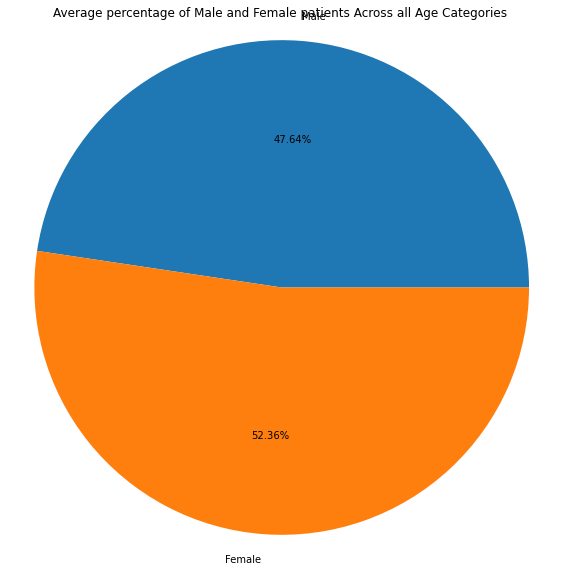

<Figure size 432x288 with 0 Axes>

In [7]:
percent_array = [average_percent_male, average_percent_female]
plt.figure(figsize=(8,8))
plt.pie(percent_array, labels=['Male', 'Female'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Average percentage of Male and Female patients Across all Age Categories')
plt.tight_layout()
plt.show()
plt.savefig('male_female_percentage.png')

In [8]:
#What are the possible outcomes of these cases?
print(df.Outcome1.unique()) #Possible outcomes are resolved, Not Resolved and Fatal
df_outcome = df.groupby('Outcome1').Row_ID.count().reset_index()
df_outcome #Creating dataframe containing number of fatal, resolved and not resolved entries
df_outcome['Percent Outcome'] = [2722/(1397+34906+2722) * 100, 1397/(1397+34906+2722)* 100, 34906/(1397+34906+2722)*100]
df_outcome
# %89.5 percent of cases are resolved, %3.6 of cases are currently not resolved and %7 of cases have resulted in death.
#Analyzing case outcome through age groups
df_outcome_age = df.groupby(['Outcome1','Age_Group']).Row_ID.nunique().reset_index()


['Resolved' 'Not Resolved' 'Fatal']


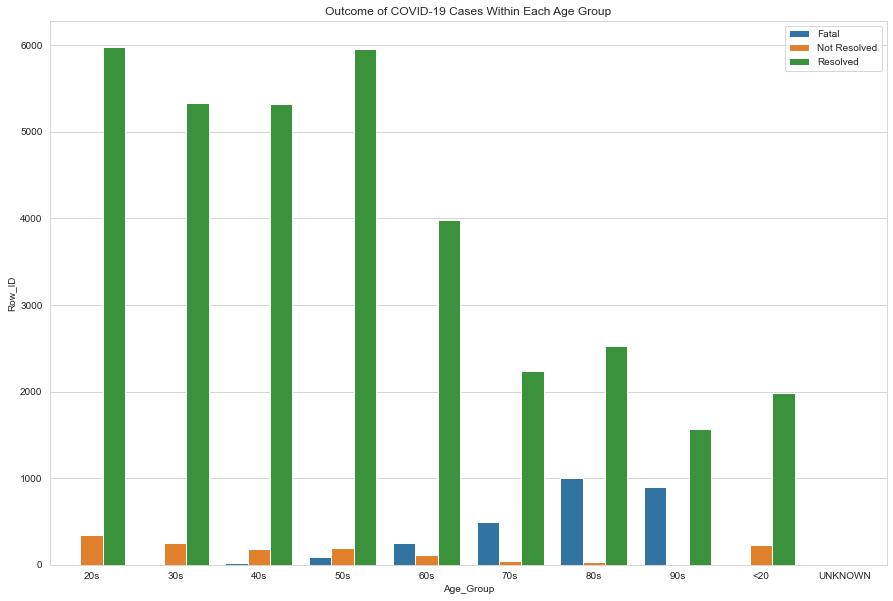

<Figure size 432x288 with 0 Axes>

In [31]:
pivot_df_outcome_age = df_outcome_age.pivot(index='Outcome1', columns='Age_Group', values='Row_ID')
start = 10**12
finish = 1.1*10**12
y = np.linspace(start , finish)


plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
g = sns.barplot(data=df_outcome_age, x='Age_Group', y='Row_ID', hue='Outcome1')
g.legend(loc = 'upper right')
plt.title('Outcome of COVID-19 Cases Within Each Age Group')
plt.show()
plt.savefig('Outcome_of_covid_within_age_group.png')
#Generated horizontal stacked bar chart showing number of people in each outcome category within each age group 

<Figure size 648x648 with 0 Axes>

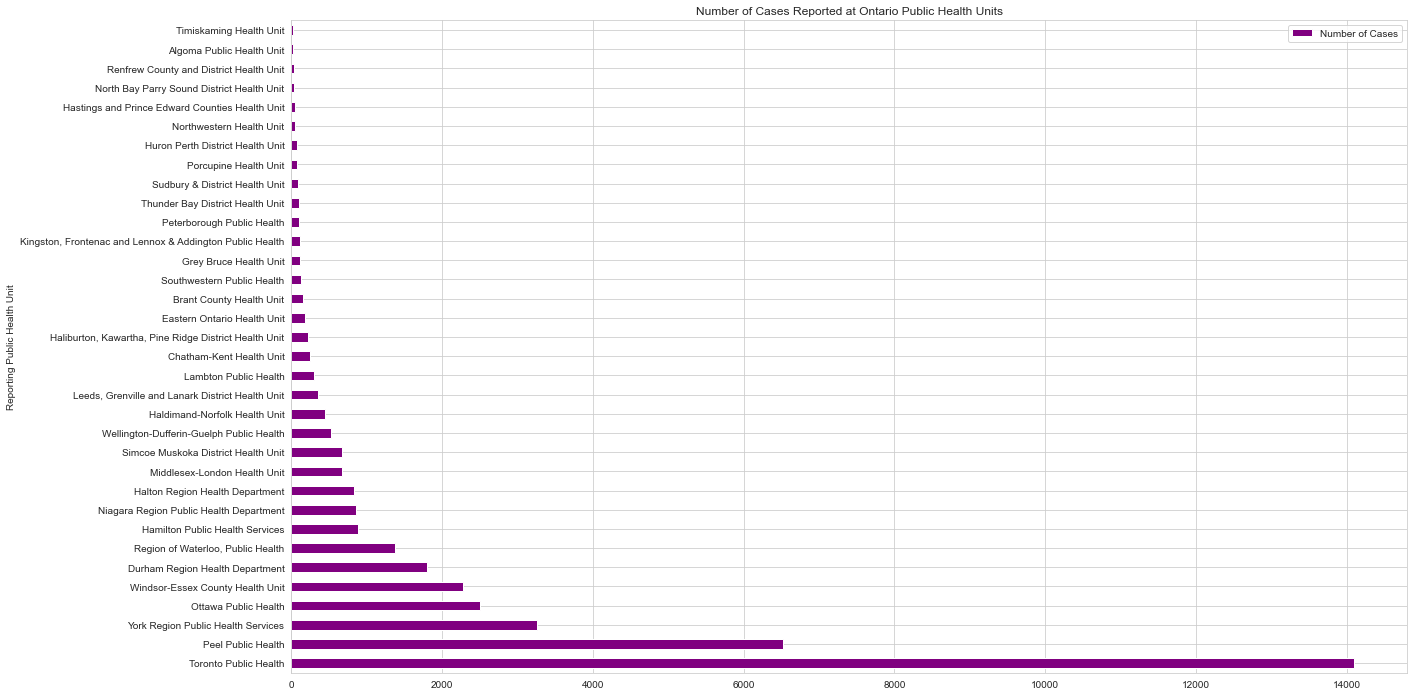

In [33]:
df_outbreak = df.groupby('Reporting_PHU').Row_ID.count().reset_index()
df_outbreak #Dataframe listing number of cases within each reporting public health unit
df_outbreak.rename(columns={'Reporting_PHU': 'Reporting Public Health Unit'}, inplace=True)
df_outbreak.rename(columns={'Row_ID': 'Number of Cases'}, inplace =True)
plt.figure(figsize=(9,9))
df_outbreak.sort_values(by='Number of Cases', ascending=False).plot(kind='barh', figsize=(20,12), x='Reporting Public Health Unit', color='purple')
plt.title('Number of Cases Reported at Ontario Public Health Units')
plt.savefig('#_cases_at_ontario_phu.png')
#Top reported PHU is the Toronto Public Health Unit, followed by Peel Public Health and York Region Public Health Services
#Bottom reported PHU's are Huron Perth District Health Unit, Hastings and Prince Edward Countries Health Unit and Northwestern Health Unit


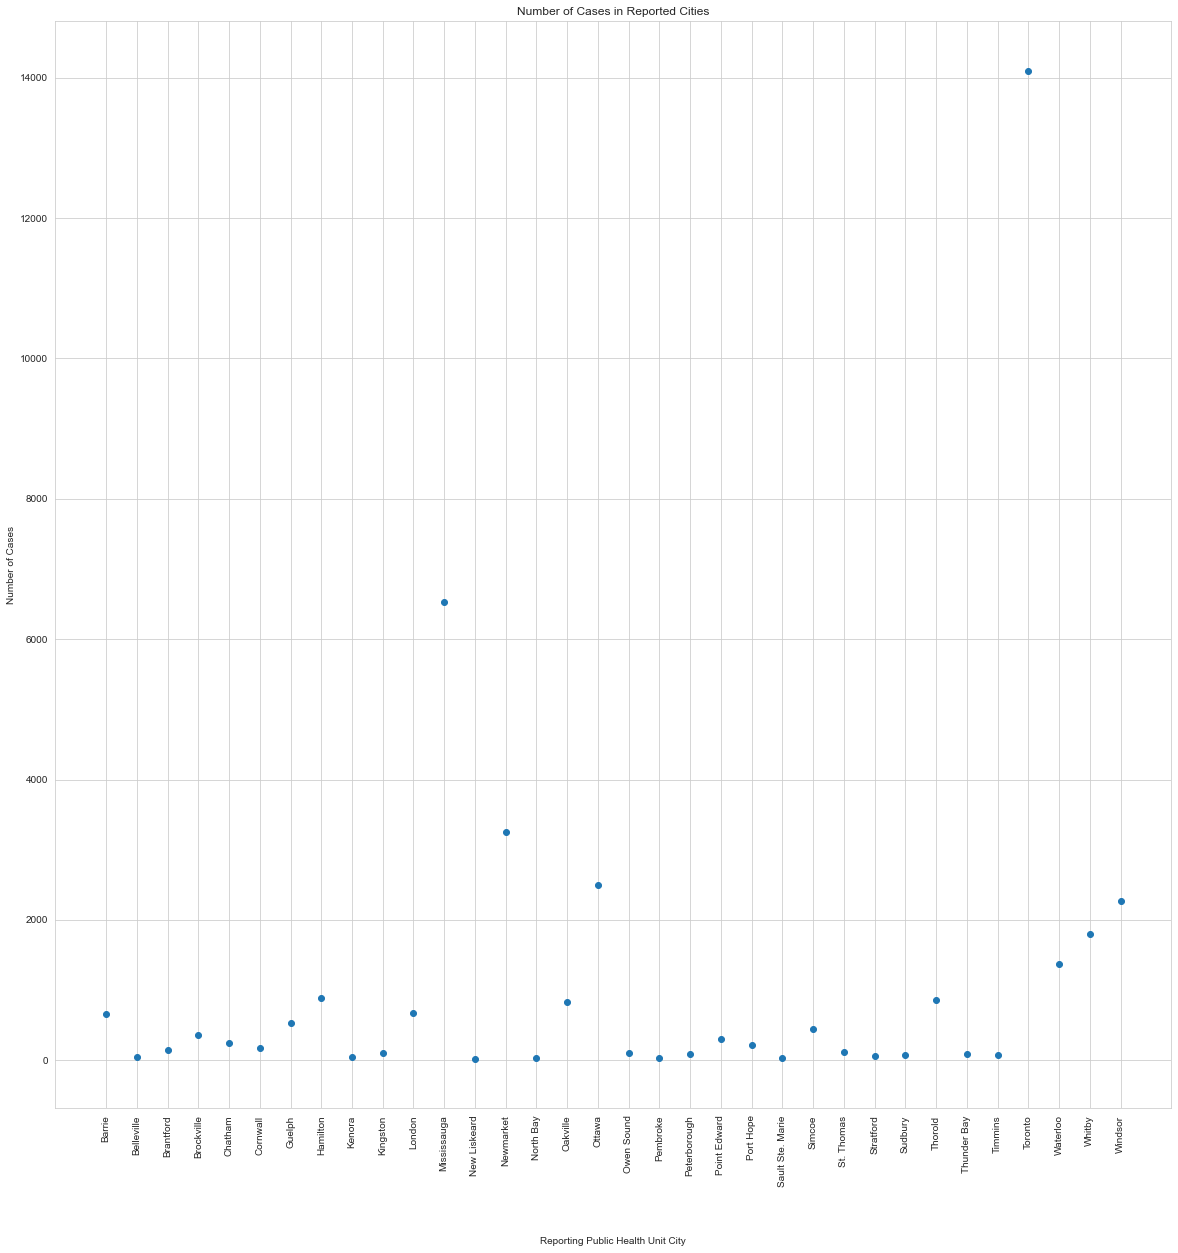

<Figure size 432x288 with 0 Axes>

In [32]:
df_city = df.groupby('Reporting_PHU_City').Row_ID.count().reset_index()
plt.figure(figsize=(20,20))
plt.scatter(df_city.Reporting_PHU_City.values, df_city.Row_ID.values)
plt.title('Number of Cases in Reported Cities')
plt.xlabel('Reporting Public Health Unit City', labelpad=50)
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()
plt.savefig('#_cases_in_reported_cities.png')
#Highest number of reported cases in a city is overwhelmingly Toronto.
#Difference between Toronto's reported cases with next highest city (Mississauga) is 7574 cases.
#From scatter plot, Toronto and Mississauga appear to be outliers do to their dense population.
#Lowest number of reported cases in a city is tied between New Liskeard and Sault Ste. Marie.